In [1]:
# import independencies
import numpy as np
import pandas as pd
import datetime
import math
from pathlib import Path
import matplotlib.pyplot as plt

In [2]:
#import ML independencies
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
import sklearn


In [3]:
#Reading sample file into a dataframe

file_path = Path('Datasource/phu_Ontario_cases.csv')
cases_df = pd.read_csv(file_path)
cases_df.head()

,FILE_DATE,PHU_NAME,PHU_NUM,ACTIVE_CASES,RESOLVED_CASES,DEATHS
0,2020-04-10,"HALIBURTON, KAWARTHA, PINE RIDGE",2235.0,23,69,18
1,2020-04-10,HALTON REGION,2236.0,112,137,9
2,2020-04-10,HASTINGS & PRINCE EDWARD COUNTIES,2238.0,12,11,1
3,2020-04-10,HURON PERTH,5183.0,20,8,1
4,2020-04-10,"KINGSTON, FRONTENAC, LENNOX & ADDINGTON",2241.0,13,39,0


# Cleaning Data 

In [4]:
# Check the columns
cases_df.columns

Index(['FILE_DATE', 'PHU_NAME', 'PHU_NUM', 'ACTIVE_CASES', 'RESOLVED_CASES',
       'DEATHS'],
      dtype='object')

In [5]:
# Drop unrelated columns from dataframe
columns_to_drop=['PHU_NAME']
cleaned_cases_df = cases_df.drop(columns= columns_to_drop)
cleaned_cases_df.columns

Index(['FILE_DATE', 'PHU_NUM', 'ACTIVE_CASES', 'RESOLVED_CASES', 'DEATHS'], dtype='object')

In [6]:
#all_cases_df
cleaned_cases_df

,FILE_DATE,PHU_NUM,ACTIVE_CASES,RESOLVED_CASES,DEATHS
0,2020-04-10,2235.0,23,69,18
1,2020-04-10,2236.0,112,137,9
2,2020-04-10,2238.0,12,11,1
3,2020-04-10,5183.0,20,8,1
4,2020-04-10,2241.0,13,39,0
...,...,...,...,...,...
14071,2021-05-13,3895.0,9801,141258,3194
14072,2021-05-13,2265.0,441,14315,254
14073,2021-05-13,2266.0,405,7041,110
14074,2021-05-13,2268.0,339,15187,423


In [7]:
#Converting date column
cleaned_cases_df['DATE'] = pd.to_datetime(cleaned_cases_df['FILE_DATE'], errors='coerce')

In [8]:
#converting Date to ordinal day
cleaned_cases_df['Day'] = cleaned_cases_df['DATE'].apply(lambda x: datetime.date.toordinal(x))-datetime.date.toordinal(datetime.date(2020,4,1))


In [9]:
# Drop Date column
cleaned_cases_df = cleaned_cases_df.drop(columns=['DATE','FILE_DATE'])
cleaned_cases_df 

,PHU_NUM,ACTIVE_CASES,RESOLVED_CASES,DEATHS,Day
0,2235.0,23,69,18,9
1,2236.0,112,137,9,9
2,2238.0,12,11,1,9
3,5183.0,20,8,1,9
4,2241.0,13,39,0,9
...,...,...,...,...,...
14071,3895.0,9801,141258,3194,407
14072,2265.0,441,14315,254,407
14073,2266.0,405,7041,110,407
14074,2268.0,339,15187,423,407


In [10]:
# Saving the dataframe into csv file
#cleaned_cases_df.to_csv('Datasource/cleaned_covid_data.csv')

In [11]:
# convering PHU from float to string
cleaned_cases_df['PHU_NUM'] = cleaned_cases_df['PHU_NUM'].fillna(0)
cleaned_cases_df['PHU_NUM'] =cleaned_cases_df.PHU_NUM.astype(float).astype(int)

# Processing Data for ML 

In [12]:
cleaned_cases_df

,PHU_NUM,ACTIVE_CASES,RESOLVED_CASES,DEATHS,Day
0,2235,23,69,18,9
1,2236,112,137,9,9
2,2238,12,11,1,9
3,5183,20,8,1,9
4,2241,13,39,0,9
...,...,...,...,...,...
14071,3895,9801,141258,3194,407
14072,2265,441,14315,254,407
14073,2266,405,7041,110,407
14074,2268,339,15187,423,407


In [13]:
# Generate our categorical variable list excet PHU
covid_cat = cleaned_cases_df.dtypes[cleaned_cases_df.dtypes == "object"].index.tolist()

# Check the number of unique values in each column
cleaned_cases_df[covid_cat].nunique()

Series([], dtype: float64)

# Scaling Data

In [14]:
#Filter results for Toronto ( PHU of 3895) to see the correlation between the death and dates 
# Every region has a different set of data and curve/line 
cleaned_cases_df = cleaned_cases_df.drop(cleaned_cases_df[cleaned_cases_df['PHU_NUM'] != 3895].index)
#PHU_s = cleaned_cases_df['PHU_NUM']
cleaned_cases_df = cleaned_cases_df.drop(columns=['PHU_NUM','ACTIVE_CASES','RESOLVED_CASES'])
cleaned_cases_df

,DEATHS,Day
20,52,9
54,69,10
88,76,11
122,78,12
156,93,13
...,...,...
13935,3159,403
13969,3164,404
14003,3171,405
14037,3179,406


In [15]:
#reset the index
covid_df = cleaned_cases_df.reset_index(drop=True)

In [16]:
#Converting the exponentional data to line using square root

covid_df['DEATHS'] = covid_df['DEATHS'].apply(lambda x:x**0.5)
covid_df

,DEATHS,Day
0,7.211103,9
1,8.306624,10
2,8.717798,11
3,8.831761,12
4,9.643651,13
...,...,...
409,56.204982,403
410,56.249444,404
411,56.311633,405
412,56.382621,406


In [17]:
# Set DEATHS as Target(y) and Remove 'DEATHS' target from features data(X)
y = covid_df.DEATHS
X = covid_df.drop(columns = ['DEATHS'])
# print(y)
# print(X)
#plt.plot(X,y)

In [18]:
# Create a model with scikit-learn
model = LinearRegression()

In [19]:
# Fit the data into the model
# By convention, X is capitalized and y is lowercase
model.fit(X, y)

# The slope
# The y-intercept
print(" The slope:", model.coef_)
print(" The y-intercept:" ,model.intercept_)

 The slope: [0.09594316]
 The y-intercept: 18.264333325392627


In [20]:
# The model creates predicted y values based on X values
y_pred = model.predict(X)
#y_pred

In [21]:
# converting the line back to curve using square
#data_df = covid_df
covid_df['Prediction'] = y_pred
#print(data_df)
covid_df['Prediction'] =covid_df['Prediction'].apply(lambda x: x**2)
covid_df['DEATHS'] = covid_df['DEATHS'].apply(lambda x: x**2)
covid_df

,DEATHS,Day,Prediction
0,52.0,9,365.873567
1,69.0,10,369.553139
2,76.0,11,373.251122
3,78.0,12,376.967515
4,93.0,13,380.702318
...,...,...,...
409,3159.0,403,3240.959783
410,3164.0,404,3251.892967
411,3171.0,405,3262.844561
412,3179.0,406,3273.814565


In [22]:
# getting R-squared score to determine how well the model fits the data
print("R-squared score : ", sklearn.metrics.r2_score(covid_df['DEATHS'],covid_df['Prediction']))

R-squared score :  0.9599594248886218


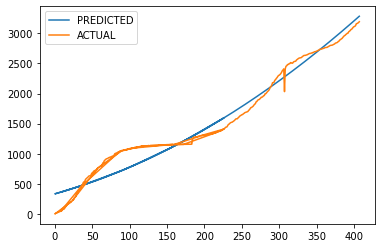

In [23]:
plt.plot(covid_df['Day'],covid_df['Prediction'], label='PREDICTED')
plt.plot(covid_df['Day'],covid_df['DEATHS'], label='ACTUAL')
plt.legend()
plt.show()

In [24]:
# PHU_df = pd.DataFrame(PHU_s)
# cleaned_cases_df = pd.concat([PHU_df, data_df], axis=1)

In [25]:
#cleaned_cases_df.to_csv('Datasource/Output_LR.csv')

In [26]:
covid_df = covid_df.reset_index(drop=True)
covid_df

,DEATHS,Day,Prediction
0,52.0,9,365.873567
1,69.0,10,369.553139
2,76.0,11,373.251122
3,78.0,12,376.967515
4,93.0,13,380.702318
...,...,...,...
409,3159.0,403,3240.959783
410,3164.0,404,3251.892967
411,3171.0,405,3262.844561
412,3179.0,406,3273.814565
